In [11]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# För dendrogrammet
from scipy.cluster.hierarchy import dendrogram, linkage
# För skalning
from sklearn.preprocessing import StandardScaler
# För Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [44]:
# Laddar upp csv-fil
Wholesale_customers_data = pd.read_csv('Wholesale customers data.csv')

In [45]:
# Vi beskriver datan med .describe
Wholesale_customers_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


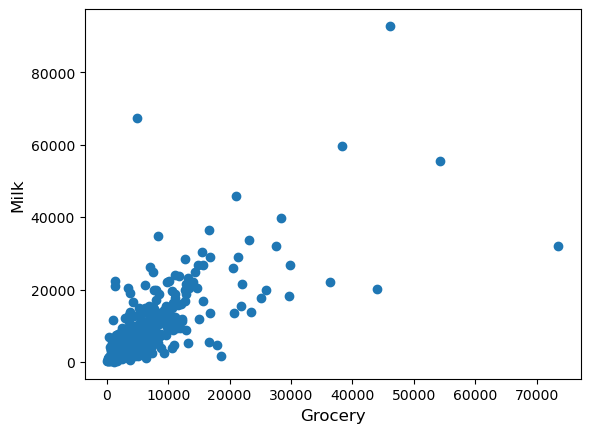

In [40]:
plt.scatter(Wholesale_customers_data.iloc[:,3].values, Wholesale_customers_data.iloc[:,4].values)
plt.xlabel("Grocery", size=12)
plt.ylabel("Milk", size=12)
plt.show()

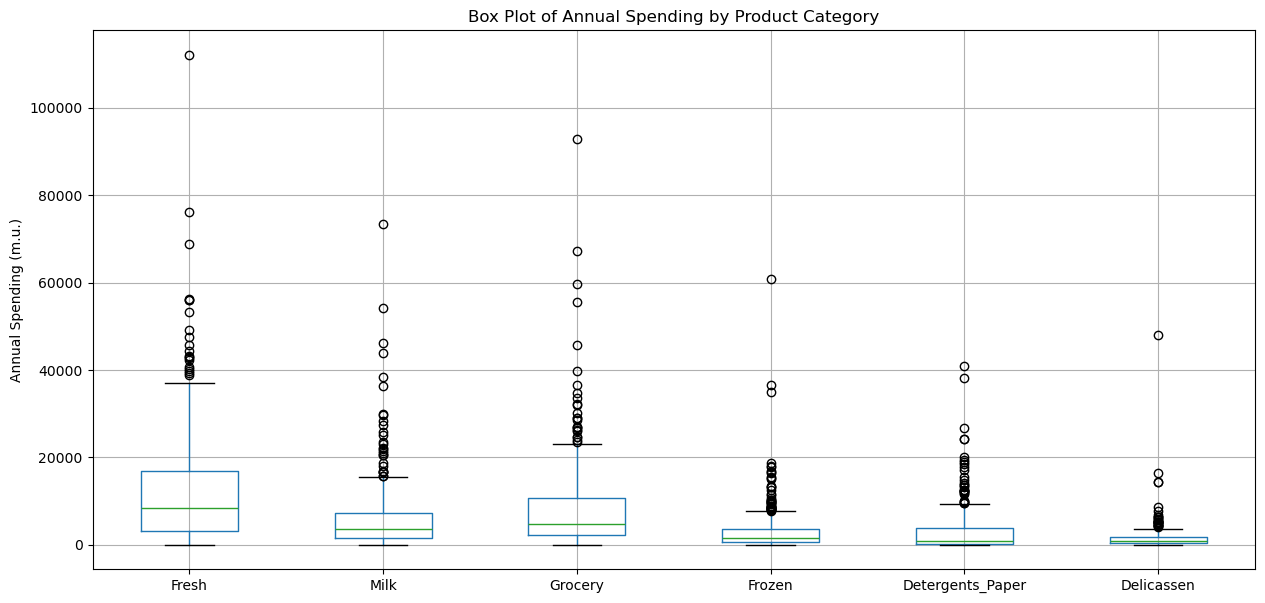

Box plot visad. Notera den stora variationen och förekomsten av outliers.


In [43]:
# Definiera kolumner med monetära enheter (m.u.)
mu_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_mu = Wholesale_customers_data[mu_cols]

# Exploratory Analysis: Box plots
plt.figure(figsize=(15, 7))
df_mu.boxplot()
plt.title('Box Plot of Annual Spending by Product Category')
plt.ylabel('Annual Spending (m.u.)')
plt.grid(True)
plt.show()

print("Box plot visad. Notera den stora variationen och förekomsten av outliers.")

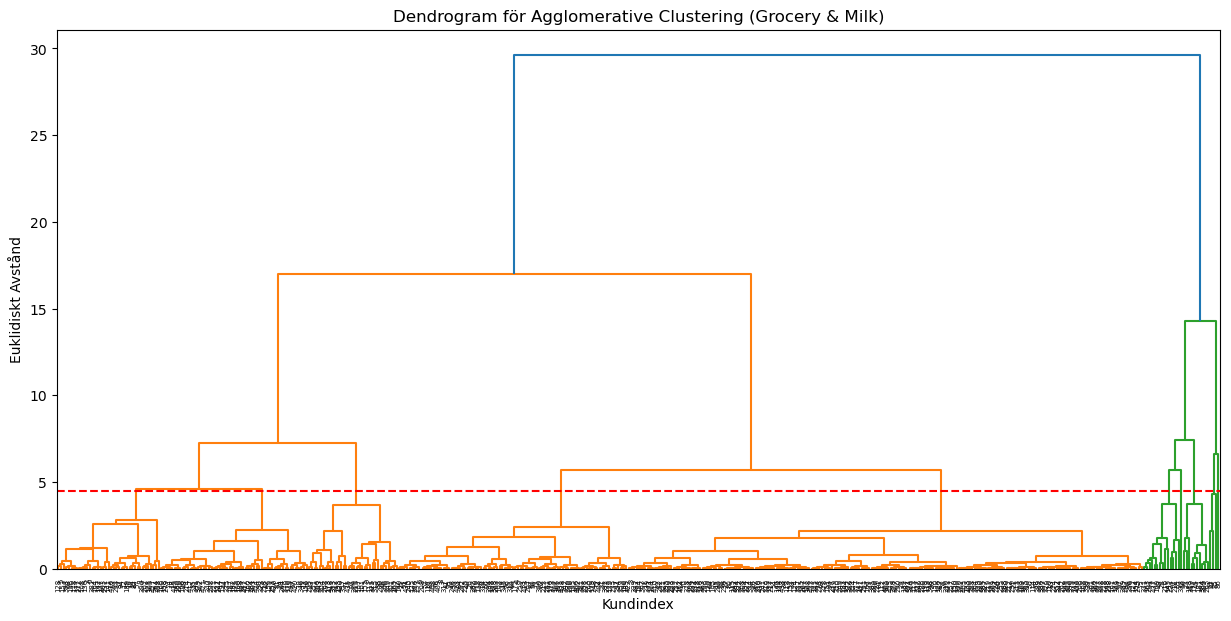

Dendrogrammet är skapat. Vi väljer k=3 baserat på snittet vid y=4.5.


In [41]:
# Välj ut valda features: Grocery och Milk
features = ['Grocery', 'Milk']
X_selected = Wholesale_customers_data[features].values

# Skala datan (Nödvändigt för avståndsbaserad klustring)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Använd Dendrogram för att hitta optimalt k
# Beräkna Linkage Matrix (med 'ward'-metoden)
linked = linkage(X_scaled, method='ward')

# Generera dendrogrammet
plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False
)
plt.title('Dendrogram för Agglomerative Clustering (Grocery & Milk)')
plt.xlabel('Kundindex')
plt.ylabel('Euklidiskt Avstånd')

# Markera ett tänkt optimalt snitt för att hitta k=3
# Värdet 4.5 är baserat på analysen i det tidigare steget.
plt.axhline(y=4.5, color='r', linestyle='--') 
plt.show()

print("Dendrogrammet är skapat. Vi väljer k=3 baserat på snittet vid y=4.5.")

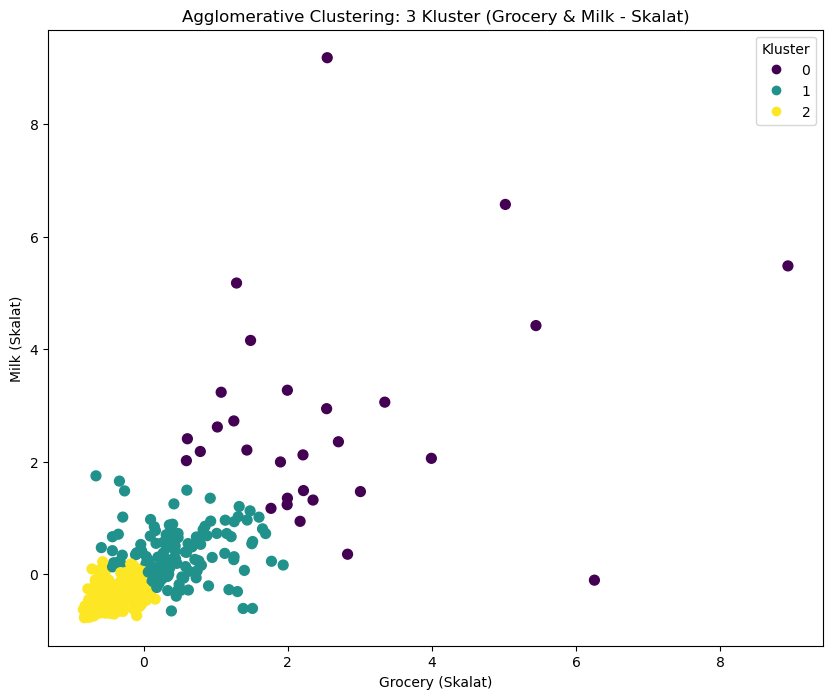

Agglomerative Clustering utförd. Klusterplott visad.

Klustersammanfattning (Genomsnittlig utgift i m.u.):
           Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster                                                                 
0        15541.0  25962.0  32404.0  4140.0           14074.0      4912.0
1         9299.0   8515.0  12620.0  2357.0            4904.0      1669.0
2        12872.0   2479.0   3301.0  3289.0             805.0      1110.0


In [31]:
# Sätt optimalt antal kluster baserat på Dendrogrammet
optimal_k = 3

# Kör Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
# Beräkna klusteretiketter och lägg till dem i DataFrame
Wholesale_customers_data['Cluster'] = agglo.fit_predict(X_scaled)

# Visualisera Klustren (på den SCALADE datan)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                      c=Wholesale_customers_data['Cluster'], 
                      cmap='viridis', 
                      s=50)

plt.title(f'Agglomerative Clustering: {optimal_k} Kluster (Grocery & Milk - Skalat)')
plt.xlabel('Grocery (Skalat)')
plt.ylabel('Milk (Skalat)')
plt.legend(*scatter.legend_elements(), title="Kluster")
plt.show()

# Beräkna klustersammanfattning (på ursprunglig data för tolkning)
mu_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
cluster_summary = Wholesale_customers_data.groupby('Cluster')[mu_cols].mean().round(0)

print("Agglomerative Clustering utförd. Klusterplott visad.")
print("\nKlustersammanfattning (Genomsnittlig utgift i m.u.):")
print(cluster_summary)